<a href="https://colab.research.google.com/github/Laaliji/Movies_Recommandation_System/blob/main/State_of_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Filtrage Collaboratif basé sur la Mémoire (Memory-based Collaborative Filtering)**

- **Concept :** Cette méthode repose sur des mesures de similarité (corrélation de Pearson, similarité cosinus) pour identifier des utilisateurs ou des films similaires. Par exemple, si l’utilisateur A et l’utilisateur B ont noté des films de manière similaire, les films aimés par B mais non vus par A seront recommandés à A.
- **Avantages :** Simple à implémenter, interprétable (on peut expliquer pourquoi un film est recommandé).
- **Limites :** Ne fonctionne pas bien avec des données éparses (matrice creuse), coûteux en calcul pour de grands ensembles (problème de scalabilité), sensible au "cold start" (nouveaux utilisateurs ou films sans données).

## Matrice de Notations Creuse

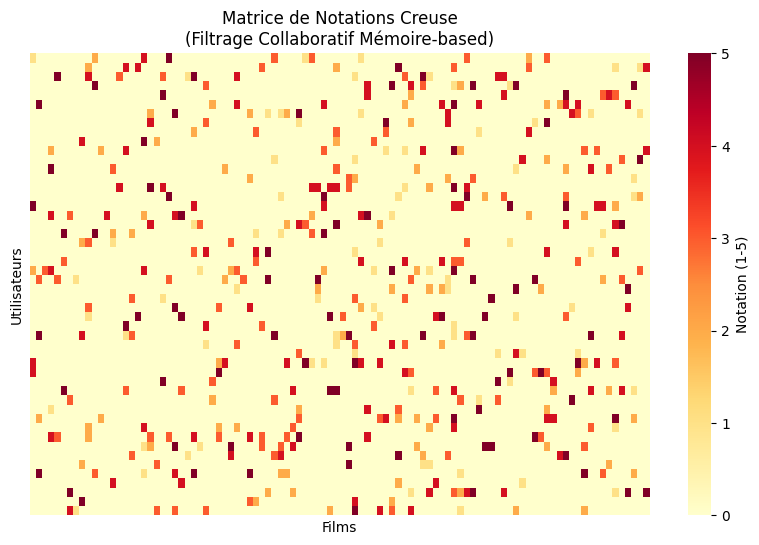

Sparsité de la matrice : 90.34%


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simuler une matrice de notations creuse
np.random.seed(42)
n_users, n_items = 50, 100
ratings = np.zeros((n_users, n_items))
for i in range(n_users):
    n_ratings = np.random.randint(5, 15)
    item_indices = np.random.choice(n_items, n_ratings, replace=False)
    ratings[i, item_indices] = np.random.randint(1, 6, n_ratings)

# Visualisation
plt.figure(figsize=(10, 6))
sns.heatmap(ratings, cmap="YlOrRd", cbar_kws={'label': 'Notation (1-5)'}, yticklabels=False, xticklabels=False)
plt.title("Matrice de Notations Creuse\n(Filtrage Collaboratif Mémoire-based)")
plt.xlabel("Films")
plt.ylabel("Utilisateurs")
plt.show()

# Calculer la sparsité
sparsity = 1 - (np.count_nonzero(ratings) / ratings.size)
print(f"Sparsité de la matrice : {sparsity:.2%}")

## Similarité entre Utilisateurs

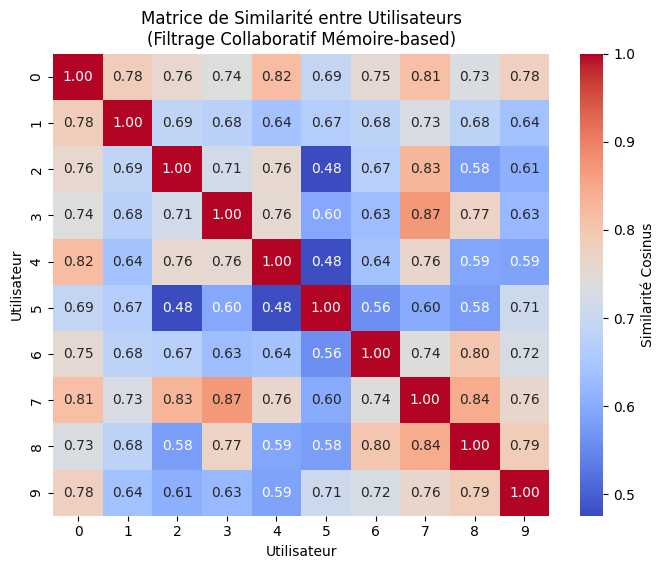

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simuler des données de notations
np.random.seed(42)
n_users, n_items = 10, 20
ratings = np.random.randint(0, 6, (n_users, n_items))

# Calculer la similarité cosinus entre utilisateurs
similarity_matrix = cosine_similarity(ratings)

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Similarité Cosinus'})
plt.title("Matrice de Similarité entre Utilisateurs\n(Filtrage Collaboratif Mémoire-based)")
plt.xlabel("Utilisateur")
plt.ylabel("Utilisateur")
plt.show()

- **Contexte d’Utilisation**

    *   **Plateformes historiques :** Utilisé dans les premières versions des systèmes de recommandation (par exemple, Amazon dans les années 2000) pour suggérer des produits similaires.
    *   **Petites plateformes :** Convient aux plateformes avec un petit nombre d’utilisateurs et de films, où la matrice de notations est moins creuse.
    *   **Recommandations explicables :** Utile lorsqu’on veut expliquer à l’utilisateur pourquoi un film est recommandé ("parce que des utilisateurs similaires l’ont aimé").

- **Interprétation pour la Présentation**

    *   **Matrice Creuse :** "Cette matrice illustre un défi majeur : la sparsité. Ici, environ 90.34% des valeurs sont manquantes, ce qui rend difficile la recherche de similarités précises entre utilisateurs ou films."
    *   **Similarité Cosinus :** "Cette matrice de similarité montre comment les utilisateurs sont comparés. Par exemple, les utilisateurs 3 et 7 ont une similarité élevée (0.87), donc leurs préférences sont proches, mais le calcul de ces similarités devient coûteux pour des millions d’utilisateurs."
    *   **Limite Clé :** "Bien que simple, cette méthode souffre face à la sparsité et au cold start, ce qui nous pousse à explorer des approches basées sur des modèles."

# **Filtrage Collaboratif basé sur les Modèles (Model-based Collaborative Filtering)**

- **Concept :** Utilise des techniques comme SVD (Singular Value Decomposition) ou NMF (Non-negative Matrix Factorization) pour factoriser la matrice de notations, capturant des relations latentes entre utilisateurs et films.
- **Avantages :** Gère mieux la sparsité, plus scalable, capture des patterns complexes.
- **Limites :** Moins interprétable, nécessite un réglage des hyperparamètres (nombre de facteurs, régularisation).

## Matrice Avant et Après SVD

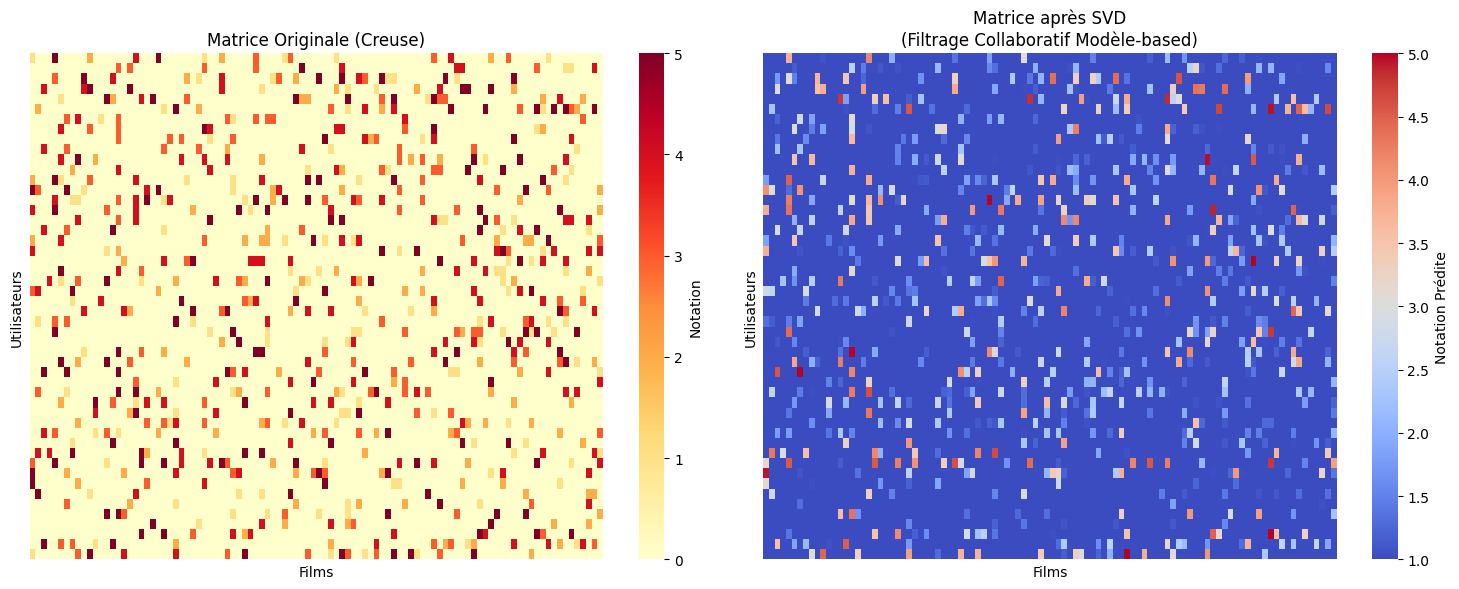

Variance expliquée par SVD : 0.70


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Simuler une matrice de notations creuse avec plus de densité initiale
np.random.seed(42)
n_users, n_items = 50, 100
ratings = np.zeros((n_users, n_items))
for i in range(n_users):
    n_ratings = np.random.randint(10, 20)  # Augmenter le nombre de notations par utilisateur (10-20 au lieu de 5-15)
    item_indices = np.random.choice(n_items, n_ratings, replace=False)
    ratings[i, item_indices] = np.random.randint(1, 6, n_ratings)

# Appliquer SVD avec plus de composantes pour capturer plus de variance
svd = TruncatedSVD(n_components=20, random_state=42)  # Augmenter à 20 composantes
ratings_reduced = svd.fit_transform(ratings)
ratings_pred = np.dot(ratings_reduced, svd.components_)
ratings_pred = np.clip(ratings_pred, 1, 5)  # Limiter entre 1 et 5

# Normaliser les prédictions pour accentuer les variations
ratings_pred_normalized = (ratings_pred - ratings_pred.min()) / (ratings_pred.max() - ratings_pred.min()) * 4 + 1

# Visualisation avec une palette de couleurs ajustée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matrice originale (creuse)
sns.heatmap(ratings, cmap="YlOrRd", vmin=0, vmax=5, cbar_kws={'label': 'Notation'}, yticklabels=False, xticklabels=False, ax=ax1)
ax1.set_title("Matrice Originale (Creuse)")
ax1.set_xlabel("Films")
ax1.set_ylabel("Utilisateurs")

# Matrice après SVD avec palette contrastée
sns.heatmap(ratings_pred_normalized, cmap="coolwarm", vmin=1, vmax=5, cbar_kws={'label': 'Notation Prédite'}, yticklabels=False, xticklabels=False, ax=ax2)
ax2.set_title("Matrice après SVD\n(Filtrage Collaboratif Modèle-based)")
ax2.set_xlabel("Films")
ax2.set_ylabel("Utilisateurs")

plt.tight_layout()
plt.show()

# Afficher la variance expliquée pour valider SVD
print(f"Variance expliquée par SVD : {svd.explained_variance_ratio_.sum():.2f}")

## Espace Latent des Utilisateurs

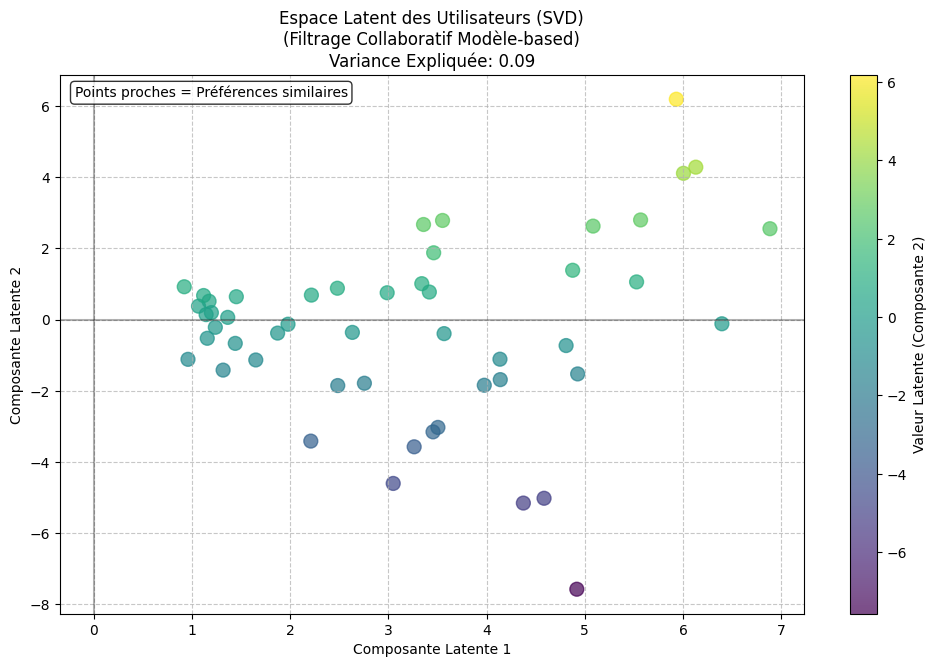

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Simuler une matrice de notations creuse plus réaliste
np.random.seed(42)
n_users, n_items = 50, 100
ratings = np.zeros((n_users, n_items))
for i in range(n_users):
    n_ratings = np.random.randint(5, 15)  # Chaque utilisateur note 5 à 15 films
    item_indices = np.random.choice(n_items, n_ratings, replace=False)
    ratings[i, item_indices] = np.random.randint(1, 6, n_ratings)  # Notations de 1 à 5

# Appliquer SVD avec un nombre ajusté de composantes
svd = TruncatedSVD(n_components=2, random_state=42)
latent_factors = svd.fit_transform(ratings)

# Calculer la variance expliquée
explained_variance_ratio = svd.explained_variance_ratio_.sum()

# Visualisation améliorée
plt.figure(figsize=(12, 7))
scatter = plt.scatter(latent_factors[:, 0], latent_factors[:, 1], c=latent_factors[:, 1], cmap='viridis', alpha=0.7, s=100)
plt.colorbar(scatter, label='Valeur Latente (Composante 2)')
plt.title(f"Espace Latent des Utilisateurs (SVD)\n(Filtrage Collaboratif Modèle-based)\nVariance Expliquée: {explained_variance_ratio:.2f}")
plt.xlabel("Composante Latente 1")
plt.ylabel("Composante Latente 2")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Ajouter une annotation pour expliquer la visualisation
plt.text(0.02, 0.98, "Points proches = Préférences similaires", transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

- **Contexte d’Utilisation**

    *   **Grandes plateformes :** Utilisé par Netflix (notamment dans le Netflix Prize de 2006-2009) pour prédire les notations des utilisateurs à grande échelle.
    *   **Recommandation en temps réel :** Convient aux systèmes nécessitant des prédictions rapides sur des bases de données massives.
    *   **Applications dynamiques :** Parfait pour les environnements où les utilisateurs ajoutent constamment des notations (par exemple, YouTube, Spotify).

- **Interprétation pour la Présentation**

    *   **Matrice Avant/Après SVD :** "À gauche, la matrice creuse montre les données réelles. À droite, SVD remplit les valeurs manquantes en capturant des relations latentes, ce qui améliore la scalabilité et gère la sparsité."
    *   **Espace Latent :** "Ce graphique montre les utilisateurs dans un espace latent réduit. Les points proches partagent des préférences similaires, mais cette représentation est moins interprétable pour les utilisateurs finaux."
    *   **Avantage Clé :** "Cette méthode est plus efficace pour les grands ensembles de données, mais elle nécessite un réglage précis des hyperparamètres."

# **Filtrage Basé sur le Contenu (Content-based Filtering)**

- **Concept :** Recommande des films similaires à ceux déjà aimés par l’utilisateur, en se basant sur leurs caractéristiques (genres, acteurs, réalisateurs).
- **Avantages :** Gère bien le "cold start" pour les films (ne dépend pas des notations d’autres utilisateurs), indépendant des données des autres utilisateurs.
- **Limites :** Nécessite des métadonnées riches, peut manquer de diversité (recommande souvent des films trop similaires).

## Espace des Caractéristiques des Films

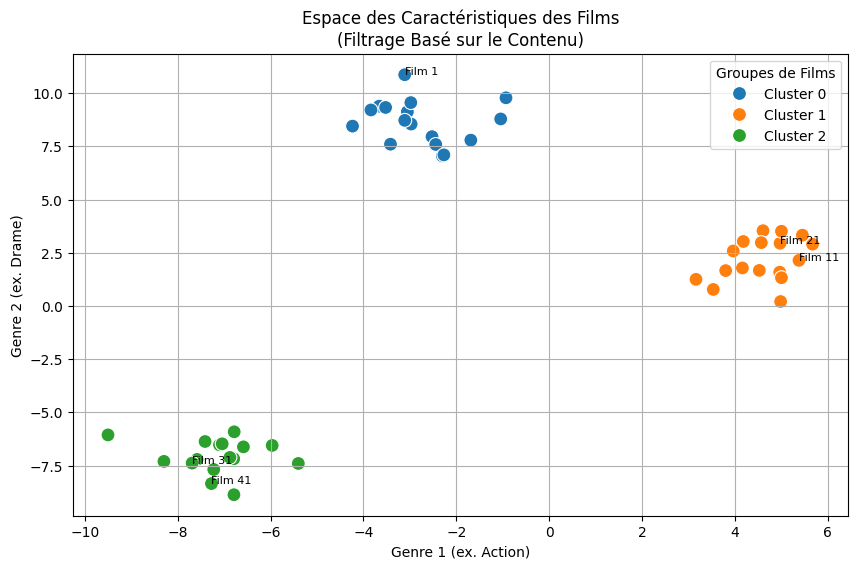

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Nombre de films
n_films = 50

# Générer des données simulées avec 3 centres (clusters)
X, y_true = make_blobs(n_samples=n_films, centers=3, n_features=2, random_state=42)

# Labels pour les films
film_labels = [f"Film {i+1}" for i in range(n_films)]

# Visualisation
plt.figure(figsize=(10, 6))

# Scatterplot avec couleur selon cluster et taille fixe des points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=[f"Cluster {label}" for label in y_true], s=100)

# Ajouter les labels de certains films tous les 10 points
for i in range(n_films):
    if i % 10 == 0:
        plt.text(X[i, 0], X[i, 1], film_labels[i], fontsize=8)

plt.title("Espace des Caractéristiques des Films\n(Filtrage Basé sur le Contenu)")
plt.xlabel("Genre 1 (ex. Action)")
plt.ylabel("Genre 2 (ex. Drame)")
plt.legend(title="Groupes de Films")
plt.grid(True)
plt.show()


## Similarité entre Films

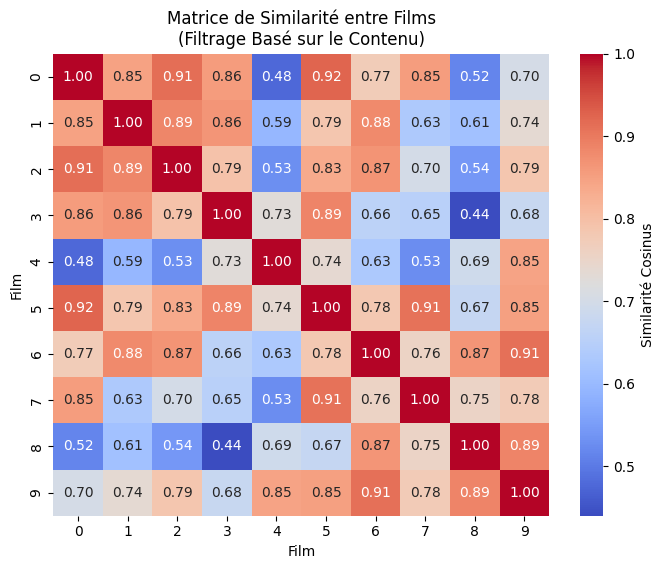

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Simuler des caractéristiques de films (genres)
n_films = 10
features = np.random.rand(n_films, 5)  # 5 caractéristiques (ex. genres)
film_labels = [f"Film {i+1}" for i in range(n_films)]

# Calculer la similarité cosinus entre films
sim_matrix = cosine_similarity(features)

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Similarité Cosinus'})
plt.title("Matrice de Similarité entre Films\n(Filtrage Basé sur le Contenu)")
plt.xlabel("Film")
plt.ylabel("Film")
plt.show()

* Contexte d’Utilisation

    * Recommandation initiale : Utile pour les nouveaux films ou plateformes où peu de données utilisateur sont disponibles (par exemple, un nouveau film sur IMDb).
    * Applications spécifiques : Convient pour des recommandations dans des domaines riches en métadonnées, comme la musique (Spotify utilise des caractéristiques audio) ou les livres (genres, auteurs).
    * Personnalisation immédiate : Idéal pour les utilisateurs qui veulent des recommandations basées uniquement sur leurs goûts passés.

* Interprétation pour la Présentation

    * Espace des Caractéristiques : "Ce graphique montre des films projetés dans un espace de caractéristiques. Les films proches (par exemple, dans le même groupe) partagent des genres similaires, ce qui facilite les recommandations pour les nouveaux films."
    * Similarité entre Films : "Cette matrice montre la similarité entre films. Par exemple, Film 1 et Film 3 ont une similarité élevée (0.86), donc ils seront recommandés ensemble, mais cela peut limiter la diversité."
    * Limite Clé : "Cette méthode est efficace pour les métadonnées riches, mais elle risque de recommander des films trop similaires, réduisant la découverte de nouveaux genres."


# **Clustering pour la Recommandation**

- **Concept :** Regroupe les utilisateurs en clusters basés sur leurs préférences, puis recommande des films populaires dans le cluster de l’utilisateur.
- **Avantages :** Réduit la complexité en travaillant sur des sous-groupes, améliore la scalabilité.
- **Limites :** Dépend de la qualité du clustering, peut manquer de personnalisation si les clusters sont trop larges.

## Clusters d’Utilisateurs

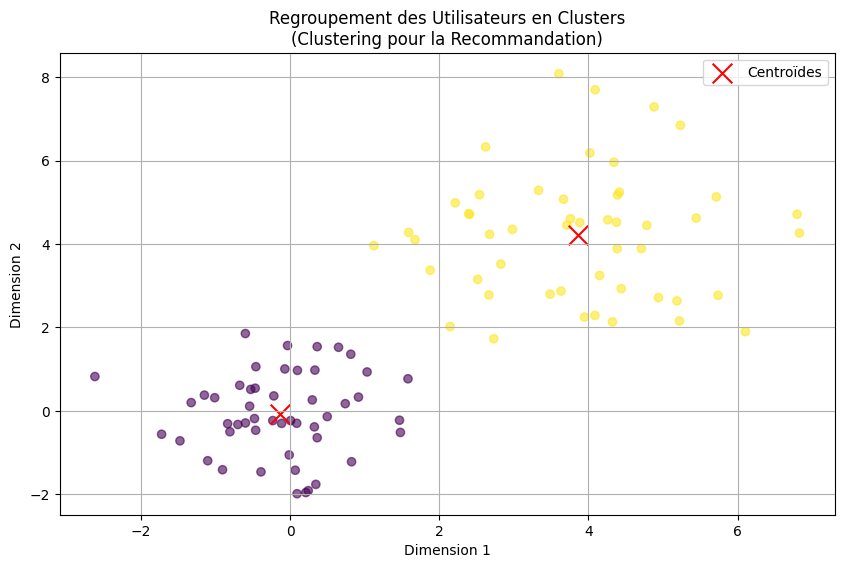

In [27]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Simuler des données
np.random.seed(42)
n_samples = 100
X = np.concatenate([np.random.normal(0, 1, (50, 2)), np.random.normal(4, 1.5, (50, 2))])

# Appliquer K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroïdes')
plt.title("Regroupement des Utilisateurs en Clusters\n(Clustering pour la Recommandation)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

## Matrice Réorganisée par Clusters

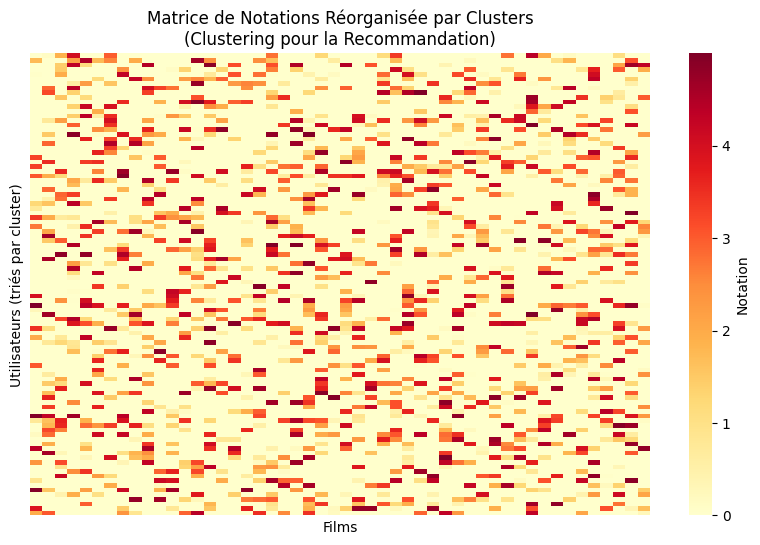

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# Simuler des données d'utilisateurs
X, _ = make_classification(n_samples=100, n_features=20, n_informative=15, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Simuler une matrice de préférences
n_items = 50
ratings = np.random.rand(100, n_items) * 5
ratings = ratings * (np.random.rand(100, n_items) > 0.7)

# Réorganiser par clusters
sorted_indices = np.argsort(labels)
ratings_sorted = ratings[sorted_indices]

# Visualisation
plt.figure(figsize=(10, 6))
sns.heatmap(ratings_sorted, cmap="YlOrRd", cbar_kws={'label': 'Notation'}, yticklabels=False, xticklabels=False)
plt.title("Matrice de Notations Réorganisée par Clusters\n(Clustering pour la Recommandation)")
plt.xlabel("Films")
plt.ylabel("Utilisateurs (triés par cluster)")
plt.show()

*   **Contexte d’Utilisation**

    *   **Segmentation marketing :** Utilisé pour identifier des groupes d’utilisateurs ayant des goûts similaires (par exemple, amateurs de thrillers vs amateurs d’animation).
    *   **Recommandation à grande échelle :** Convient aux plateformes avec des millions d’utilisateurs, où le clustering réduit la complexité.
    *   **Analyse des préférences :** Utile pour des études de marché ou pour comprendre les tendances des utilisateurs.

*   **Interprétation pour la Présentation**

    *   **Clusters d’Utilisateurs :** "Ce graphique montre comment les utilisateurs sont regroupés en clusters. Les points proches partagent des préférences similaires, ce qui permet de réduire la complexité des recommandations."
    *   **Matrice Réorganisée :** "Cette matrice réorganisée par clusters montre des motifs dans les notations. Chaque bloc correspond à un cluster, mais si les clusters sont trop larges, la personnalisation peut être limitée."
    *   **Limite Clé :** "Le clustering est efficace pour la scalabilité, mais dépend de la qualité de la segmentation."